In [1]:
from ko_crawler import *
from ko_text import *
import ast

import pickle

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
nlp = NLP()

In [3]:
train_df = pd.read_csv('Data/train_page=100~500.csv',
                       usecols = ['Text','Section'],
                       dtype = {'Section' : 'category'},
                       #converters = {'Token' : ast.literal_eval},
                     )

test_df = pd.read_csv('Data/test_page=0~100.csv',
                       usecols = ['Text','Section'],
                       dtype = {'Section' : 'category'},
                       #converters = {'Token' : ast.literal_eval},
                     )

In [4]:
token_ls = nlp.extract_morphs_for_each_document_FAST_VERSION(test_df['Text'])

In [4]:
train_df.memory_usage(deep = True)

Index             80
Text       209775216
Section        91100
dtype: int64

In [5]:
test_df.memory_usage(deep = True)

Index            80
Text       52248310
Section       23599
dtype: int64

In [6]:
train_df.head()

,Text,Section
0,NH농협금융지주는 김광수 회장이 22일 서대문 본사에서 농협금융 자회사 대표들과 ...,경제
1,삼성바이오로직스는 올해 개별기준 3분기 영업이익이 105억원으로 작년 동기보다 48...,경제
2,코스피 연저점이 붕괴하면서 원/달러 환율이 큰 폭으로 뛰었다.\n23일 서울 외환시...,경제
3,"정의당, 국회서 `롯데 갑질 피해자` 간담회 개최\n김상조 공정거래위원장은 23일 ...",경제
4,"코스피가 23일 무역전쟁 등 대내외 악재로 힘없이 2,110선을 내줬다. \...",경제


# 전처리 결과 확인

In [7]:
train_df['Text'][0][:500]

'NH농협금융지주는 김광수 회장이 22일 서대문  본사에서 농협금융 자회사 대표들과 3분기 종합경영성과 분석회의를 했다고 23일 밝혔다. \n회의에서는 NH농협카드와 NH농협캐피탈의 체질개선과 질적 성장 방안이 주로 논의됐다. \n김 회장은 농협카드에 "조직 효율성과 인적 전문성을 높이고, 독립적  성과평가를 통해 책임경영 체제를 확립하라"고 주문했다. \n또 "상품별·고객별 수익성 분석을 고도화해 일반 카드사 수준의 경영 인프라를 구축하라"고 당부했다. \n김 회장은 NH농협캐피탈과 관련해서는 산업재 금융은 건설경기 악화를 염두에  두고 자산 건전성 개선 노력을 이어가고, 기업금융은 취급시부터 위험관리를 철저히 해야 한다고 강조했다. \n김 회장은 연말 인사에서는 업무경력과 직무 전문성을 우선 고려하겠다고  말했다.\n[연합뉴스] Copyrights ⓒ 연합뉴스. 무단 전재 및 재배포금지\n\nwindow.jQuery || document.write("<script src=\'//common.mk.'

In [8]:
' '.join(nlp.extract_morphs_for_each_document_FAST_VERSION(train_df['Text'].iloc[:4])[0])[:500]

'NH 농협 금융 지주 김광수 회장 22일 서대문 본사 에서 농협 금융 자회사 대표 3분 종합 경영 성과 분석 회의 했다고 23일 밝혔다 회의 에서는 NH 농협카드 NH 농협 캐피탈 체질개선 질적 성장 방안 주로 논의 됐다 회장 농협카드 조직 효율 성과 인적 전문성 높이 독립 성과 평가 통해 책임 경영 체제 확립 라고 주문 했다 상품 고객 수익 분석 고도화 일반 카드 수준 경영 인프라 축하 라고 당부 했다 회장 NH 농협 캐피탈 관련 해서는 산업 금융 건설 경기 악화 염두 두고 자산 건전성 개선 노력 어가 기업 금융 취급 부터 위험관리 철저히 해야 한다고 강조 했다 회장 연말 인사 에서는 업무 경력 직무 전문성 우선 고려 하겠다고 했다'

# Tokenizing 알고리즘 비교 (Single vs Multithread)

In [ ]:
'''
single_ls = []
multi_4_ls = []
multi_6_ls = []

for n in range(0,5000, 250):
    if n == 0:         continue
    
    # single
    start_time = time.time()
    nlp.extract_morphs_for_each_document(test_df['Text'].iloc[:n])
    single_ls.append(time.time() - start_time)
    
    # multi-thread : 4
    start_time = time.time()
    nlp.extract_morphs_for_each_document_FAST_VERSION(test_df['Text'].iloc[:n], n_thread= 4)
    multi_4_ls.append(time.time() - start_time)
    
    # multi-thread : 6
    start_time = time.time()
    nlp.extract_morphs_for_each_document_FAST_VERSION(test_df['Text'].iloc[:n], n_thread= 6)
    multi_6_ls.append(time.time() - start_time)


plt.figure(figsize = (12,6))
x = np.arange(250,5000,250)
plt.plot(x,single_ls, label = 'Single')
plt.plot(x,multi_4_ls, label = '4-Thread')
plt.plot(x,multi_6_ls, label = '6-Thread')

plt.legend(loc = 'best')
plt.ylabel('Time(s)')
plt.xlabel('number of documents')
plt.title('Single vs Multi-thread', fontsize = 20)'''

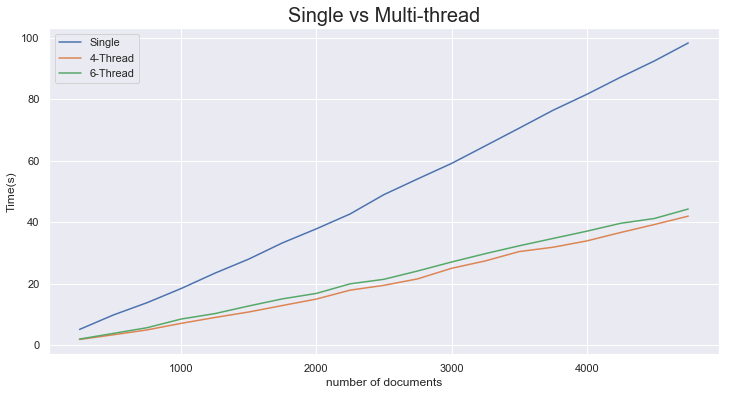

In [9]:
from IPython.display import Image

Image('images/tokenizing_multi-thread.png')

# **Cleaning, Tokenizing 수행**
 - ## 최초 1회만 수행한 후, 결과를 저장하여 불러와서 쓴당

In [9]:
if not 'Token' in train_df.columns:
    start_time = time.time()
    train_df['Token'] = nlp.extract_morphs_for_each_document_FAST_VERSION(train_df['Text'], n_thread = 4)

    '''
    # token_ls를 pickle 파일로 저장
    with open('train_token_ls_100~500.pickle', 'wb') as f:
        pickle.dump(train_token_ls, f, pickle.HIGHEST_PROTOCOL)
    '''
    print(time.time() - start_time)
    
    train_df[['Token','Section']].to_csv('Data/train_df_page=100~500.csv')

1036.536881685257


In [10]:
if not 'Token' in test_df.columns:

    start_time = time.time()

    test_df['Token'] = nlp.extract_morphs_for_each_document_FAST_VERSION(test_df['Text'], n_thread = 4)
    '''
    # token_ls를 pickle 파일로 저장
    with open('test_token_ls_0~100.pickle', 'wb') as f:
        pickle.dump(test_token_ls, f, pickle.HIGHEST_PROTOCOL)
    '''
    print(time.time() - start_time)
    
    test_df[['Token','Section']].to_csv('Data/test_df.csv')

267.84356451034546
